# Введение в анализ векторных данных с помощью пакета `geopandas`

[GeoPandas](https://geopandas.org/) [1] — это пакет Python, который расширяет возможности очень популярной библиотеки Pandas и предоставляет возможность читать, анализировать и визуализировать геопространственные данные. Основными структурами данных в GeoPandas являются `GeoSeries` и `GeoDataFrame`. При работе с пространственными данными они имеют расширенные возможности по сравению с `Series` и `DataFrame`. Основное отличие `GeoDataFrame` - она содержит один столбец с вектроными данными в виде shapely объектов (точки, линии, полигоны, мультиполигоны и т. д.), обычно именуемый `geometry`.

## Начало работы с `geopandas`

Подобно подключению библиотеки pandas как `pd`, мы будем подключать geopandas как `gpd`:

In [3]:
import geopandas as gpd

## Чтение геопростанственных данных из shape-файла

В `geopandas`, мы можем использовать функцию `.from_file()` для чтения в различных форматах данных (включая файлы *.shp*). В моей папке содержатся некоторые данные о границах морских объектов всемирного наследия ЮНЕСКО (доступны по ссылке - [UNESCO World Heritage Marine Sites](https://www.marineregions.org/download_file.php?name=WorldMarineHeritageSites_v2.zip) [2]). Cначала определим путь к скаченному архиву:

In [1]:
from pathlib import Path

data_folder = Path('~/py-proj/course/02-data/shapefiles/unesco').expanduser()
fn = data_folder / 'WorldMarineHeritageSites_v2.zip'
print(fn)

C:\Users\user\py-proj\course\02-data\shapefiles\unesco\WorldMarineHeritageSites_v2.zip


Теперь мы можем указать полный путь к файлу `fn` в качестве единственного аргумента функции `from_file`
Здесь же проверим тип переменной `data`, содержащей считанные геопространственные данные

In [4]:
data = gpd.read_file(fn)
type(data)

geopandas.geodataframe.GeoDataFrame

In [6]:
data['COUNTRY'].nunique()

34

Здесь мы видим, что переменная `data` - структура данных `GeoDataFrame`, предоставляющая расширенный функционал для работы с пространственными данными. Мы можем применить многие распространенные методы `pandas` для изучения содержимого. Рассмотрим подробнее первые пять строк данных:

In [5]:
data.head()

,FULL_NAME,COUNTRY,YEAR,BEAUTY,GEOLOGY,ECOLOGY,HABITAT,LONG_WHC,LAT_WHC,SOURCE,BUFFER,URL,MRGID,REFID,AREA_KM2,geometry
0,Aldabra Atoll,Seychelles,1982,1,0,1,1,46.337956,-9.416782689,UNESCO World Heritage Centre,false,http://whc.unesco.org/en/list/185,26836,185,495.0,"POLYGON ((46.43239 -9.35855, 46.45735 -9.35992..."
1,Archipiélago de Revillagigedo,Mexico,2016,1,0,1,1,-110.9752778,18.78805556,UNESCO World Heritage Centre,false,http://whc.unesco.org/en/list/1510,64215,1510,6375.0,"MULTIPOLYGON (((-114.68718 18.16876, -114.7395..."
2,Archipiélago de Revillagigedo,Mexico,2016,1,0,1,1,-110.9752778,18.78805556,UNESCO World Heritage Centre,true,http://whc.unesco.org/en/list/1510,64215,1510,141764.0,"POLYGON ((-115.47139 17.65528, -115.47139 20.0..."
3,Area de Conservación Guanacaste,Costa Rica,1999,0,0,1,1,-85.81603029,10.76320069,UNESCO World Heritage Centre,false,http://whc.unesco.org/en/list/928,26837,928,1452.0,"MULTIPOLYGON (((-85.57398 11.04824, -85.56947 ..."
4,Banc d'Arguin National Park,Mauritania,1989,0,0,1,1,-16.4035691,20.0775406,UNESCO World Heritage Centre,false,http://whc.unesco.org/en/list/506,26838,506,11958.0,"POLYGON ((-16.06520 19.39622, -16.08443 19.342..."


#### Задание 2.2

Выясните следующую информацию из наших входных данных, используя опыт работы в `pandas`:
    
- Количество объектов всемирного наследия ЮНЕСКО?
- В скольких странах эти объекты расположены?
- Какова суммарная площадь объектов (на основе столбца `AREA_KM2`)?

Давайте исследуем свои данные на карте. Для создания простой карты на основе данных `GeoDataFrame` можно использовать функцию .plot() из библиотеки `geopandas`, которая формирует карту на основе векторных объектов в столбце `geometry`. На самом деле `geopandas` использует библиотеку  для построения графиков `matplotlib`. Выполним быструю визуализацию наших данных:

<Axes: >

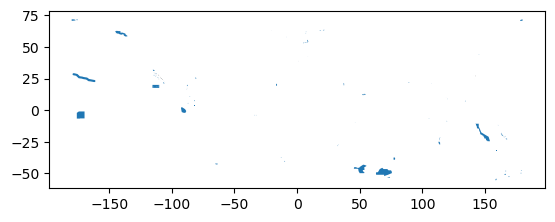

In [6]:
data.plot()

_**Рис. 1**. Объекты всемирного наследия ЮНЕСКО на карте_

Теперь у нас есть общее представление о геометрии этих данных. Оси x и y на графике основаны на значениях координат в столбце `geometry`. В нашем случае это географические координаты в градусах. Как мы видим, объекты ЮНЕСКО расположены в самых разных местах северного и в южного полушарий Земли.

## Векторные объекты в `geopandas`

Особенность структуры данных `GeoDataFrame` является столбец для хранения векторных объектов (точки, линии, полигоны) с типичным именем `geometry`. Посмотрим на столбец `geometry` в наших данных:

In [7]:
data["geometry"].head()

0    POLYGON ((46.43239 -9.35855, 46.45735 -9.35992...
1    MULTIPOLYGON (((-114.68718 18.16876, -114.7395...
2    POLYGON ((-115.47139 17.65528, -115.47139 20.0...
3    MULTIPOLYGON (((-85.57398 11.04824, -85.56947 ...
4    POLYGON ((-16.06520 19.39622, -16.08443 19.342...
Name: geometry, dtype: geometry

Как мы видим, `geometry` столбец содержит полигоны (`POLYGON`) и набор полигонов (`MULTIPOLYGON`). Поскольку эти полигоны являются объектами библиотеки `Shapely`, мы можем использовать соответсвующие методы и в `geopandas`. Многие методы могут быть применены сразу ко всем объектам в структуре данных `GeoDataFrame`:

In [8]:
data["geometry"].area.head()

C:\Users\user\AppData\Local\Temp\ipykernel_5580\3282792761.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  data["geometry"].area.head()


0     0.040720
1     0.546434
2    12.145877
3     0.120061
4     1.032630
dtype: float64

Рассчитаем площади объектов всемирного наследия ЮНЕСКО более простым способом, сохраним их в новый столбец `area_km2` и выведем на экран (поскольку координаты в градусах - резульаты будут неточны)

In [9]:
# Get area and convert from deg to km2
data["area_km2"] = data.area * 111 ** 2

#output area_km2 column
data["area_km2"].head()

C:\Users\user\AppData\Local\Temp\ipykernel_5580\3232119693.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  data["area_km2"] = data.area * 111 ** 2


0       501.716941
1      6732.612778
2    149649.352422
3      1479.274824
4     12723.033217
Name: area_km2, dtype: float64

Точно также мы можем определить геометрический центр тяжести (`centroid`), протяженность (`length`), границы (`bounds`) каждого объекта:

In [10]:
print(data.centroid.head())
print(data.length.head() * 111)
print(data.bounds.head())

0      POINT (46.34820 -9.41965)
1    POINT (-112.06444 18.82763)
2    POINT (-112.80668 18.83214)
3     POINT (-85.64729 10.84852)
4     POINT (-16.40360 20.07845)
dtype: geometry
0      95.730758
1     586.434606
2    2306.194606
3     440.114043
4     489.796903
dtype: float64
         minx       miny        maxx       maxy
0   46.187185  -9.506917   46.537785  -9.351308
1 -114.942339  18.162960 -110.617662  19.501120
2 -115.471389  17.655278 -110.078056  20.008611
3  -86.001389  10.592997  -85.255054  11.050803
4  -16.751544  19.341806  -15.963423  20.834473


C:\Users\user\AppData\Local\Temp\ipykernel_5580\3035340223.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print(data.centroid.head())
C:\Users\user\AppData\Local\Temp\ipykernel_5580\3035340223.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print(data.length.head() * 111)


#### Задание 2.3

Используя опыт работы с библиотекой `pandas` выведите на экран ответы на следующие вопросы:

- Какова минимальная, максимальная и средняя площадь объектов всемирного наследия ЮНЕСКО (на основе столбца `AREA_KM2`)?
- Какой объект ЮНЕСКО, расположен за северным полярным кругом. Кратко напишите о нем (ссылка с описанием объекта -  в столбце `URL`)?

## Запись данных в файл

Можно экспортировать пространственные данные в различные форматы данных (не только в формате `.shp`, но и, например, `.geojson`), используя метод `.to_file()` из библиотеки `geopandas`:

In [11]:
# Create a output path for the data
output_fp = data_folder / "UNESCO_objects.geojson"

# Write the file
data.to_file(output_fp, driver='GeoJSON')

Читаем данные из сохраненного файла и проверяем содержимое:

                         FULL_NAME     COUNTRY  YEAR BEAUTY GEOLOGY ECOLOGY   
0                    Aldabra Atoll  Seychelles  1982      1       0       1  \
1    Archipiélago de Revillagigedo      Mexico  2016      1       0       1   
2    Archipiélago de Revillagigedo      Mexico  2016      1       0       1   
3  Area de Conservación Guanacaste  Costa Rica  1999      0       0       1   
4      Banc d'Arguin National Park  Mauritania  1989      0       0       1   

  HABITAT      LONG_WHC       LAT_WHC                        SOURCE BUFFER   
0       1     46.337956  -9.416782689  UNESCO World Heritage Centre  false  \
1       1  -110.9752778   18.78805556  UNESCO World Heritage Centre  false   
2       1  -110.9752778   18.78805556  UNESCO World Heritage Centre   true   
3       1  -85.81603029   10.76320069  UNESCO World Heritage Centre  false   
4       1   -16.4035691    20.0775406  UNESCO World Heritage Centre  false   

                                  URL  MRGID REFID      

<Axes: >

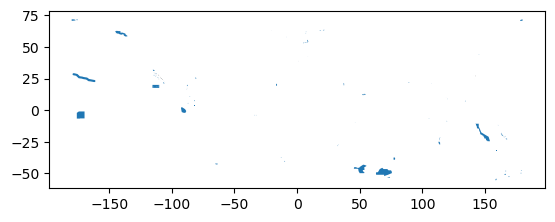

In [12]:
ds = gpd.read_file(output_fp)
print(ds.head())
ds.plot()

### Список использованных источников

1. https://geopandas.org/
2. https://www.marineregions.org/download_file.php?name=WorldMarineHeritageSites_v2.zip